In [59]:
from DS_detector import gen_pics_for_detection, detect_clusters
from DS_Planck_Unet import *
from DS_data_transformation import draw_df
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from tensorflow import convert_to_tensor

In [38]:
model = unet_planck(
    weights='/home/rt2122/Models/planck_z/f8d2.ep0063-vl0.030814-l0.039882.h5')

In [48]:
all_dict = gen_pics_for_detection(6, model, step=16)

In [18]:
thr_list = [0.1 * i for i in range(9, 0, -1)]

In [44]:
stat_p = []
stat_pnz = []
stat_m = []
for thr in tqdm(thr_list):
    stat_p.append(pd.DataFrame(detect_clusters(all_dict, thr, main_cat='planck_z'), 
                                index=[0]))
    stat_pnz.append(pd.DataFrame(detect_clusters(all_dict, thr, main_cat='planck_no_z'), 
                                index=[0]))
    stat_m.append(pd.DataFrame(detect_clusters(all_dict, thr, main_cat='mcxcwp'), 
                                index=[0]))
stat_p = pd.concat(stat_p)
stat_pnz = pd.concat(stat_pnz)
stat_m = pd.concat(stat_m)

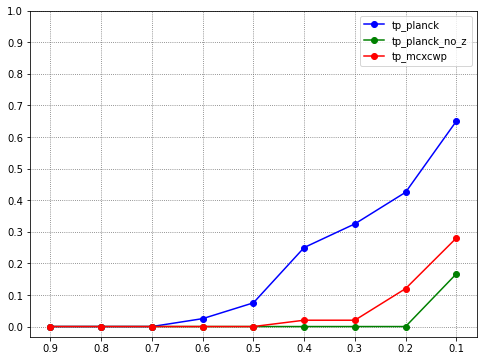

In [45]:
draw_df(None, {'tp_planck' : stat_p['tp'] / (stat_p['tp'] + stat_p['fn']), 
               'tp_planck_no_z' : stat_pnz['tp'] / (stat_pnz['tp'] + stat_pnz['fn']),
               'tp_mcxcwp' : stat_m['tp'] / (stat_m['tp'] + stat_m['fn']),
              },
        thr_list, ygrid=np.arange(0,1.1, 0.1))

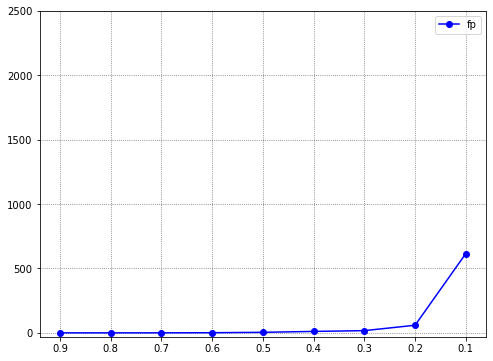

In [46]:
draw_df(None, {'fp':stat_p['fp']},
        thr_list, ygrid=np.arange(0,2600,500))

In [47]:
stat_p

,tp,fp,tn,fn
0,0,0,416,40
0,0,0,416,40
0,0,0,416,40
0,1,1,415,39
0,3,4,406,37
0,10,11,376,30
0,13,17,359,27
0,17,59,327,23
0,26,615,31,14


In [64]:
model1 = unet_planck(
    weights='/home/rt2122/Models/planck_z/f8d2.ep81.h5')

In [65]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=10, epochs=64, 
                    validation_data=val_gen, validation_steps=1, initial_epoch=63)

Epoch 64/64


ValueError: in user code:

    /home/rt2122/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /home/rt2122/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/rt2122/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/rt2122/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/rt2122/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:540 train_step  **
        _minimize(self.distribute_strategy, tape, self.optimizer, loss,
    /home/rt2122/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1803 _minimize
        gradients = optimizer._aggregate_gradients(zip(gradients,  # pylint: disable=protected-access
    /home/rt2122/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:521 _aggregate_gradients
        filtered_grads_and_vars = _filter_grads(grads_and_vars)
    /home/rt2122/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:1218 _filter_grads
        raise ValueError("No gradients provided for any variable: %s." %

    ValueError: No gradients provided for any variable: ['conv2d_126/kernel:0', 'conv2d_126/bias:0', 'conv2d_127/kernel:0', 'conv2d_127/bias:0', 'conv2d_128/kernel:0', 'conv2d_128/bias:0', 'conv2d_129/kernel:0', 'conv2d_129/bias:0', 'conv2d_130/kernel:0', 'conv2d_130/bias:0', 'conv2d_131/kernel:0', 'conv2d_131/bias:0', 'conv2d_132/kernel:0', 'conv2d_132/bias:0', 'conv2d_133/kernel:0', 'conv2d_133/bias:0', 'conv2d_134/kernel:0', 'conv2d_134/bias:0', 'conv2d_135/kernel:0', 'conv2d_135/bias:0', 'conv2d_136/kernel:0', 'conv2d_136/bias:0', 'conv2d_137/kernel:0', 'conv2d_137/bias:0', 'conv2d_138/kernel:0', 'conv2d_138/bias:0', 'conv2d_139/kernel:0', 'conv2d_139/bias:0', 'conv2d_140/kernel:0', 'conv2d_140/bias:0', 'conv2d_141/kernel:0', 'conv2d_141/bias:0', 'conv2d_142/kernel:0', 'conv2d_142/bias:0', 'conv2d_143/kernel:0', 'conv2d_143/bias:0', 'conv2d_144/kernel:0', 'conv2d_144/bias:0', 'conv2d_145/kernel:0', 'conv2d_145/bias:0', 'conv2d_146/kernel:0', 'conv2d_146/bias:0'].


In [54]:
val_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', val_pix, batch_size, 
                   search_nside=256, min_rad=min_rad, centers_in_patch=True)
train_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', train_pix, batch_size, 
                    search_nside=256, min_rad=min_rad, centers_in_patch=True)
test_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', test_pix, 1, 
                   search_nside=256, min_rad=min_rad, centers_in_patch=True)

In [53]:
batch_size = 20
min_rad = 2.0

In [57]:
pic, mask = next(test_gen)

In [58]:
type(pic)

numpy.ndarray

In [60]:
pic = convert_to_tensor(pic)
mask = convert_to_tensor(mask)

In [67]:
history = model.fit(pic, mask, epochs=82, 
                              initial_epoch=81)

Epoch 82/82


ValueError: in user code:

    /home/rt2122/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /home/rt2122/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/rt2122/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/rt2122/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/rt2122/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:540 train_step  **
        _minimize(self.distribute_strategy, tape, self.optimizer, loss,
    /home/rt2122/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1803 _minimize
        gradients = optimizer._aggregate_gradients(zip(gradients,  # pylint: disable=protected-access
    /home/rt2122/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:521 _aggregate_gradients
        filtered_grads_and_vars = _filter_grads(grads_and_vars)
    /home/rt2122/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:1218 _filter_grads
        raise ValueError("No gradients provided for any variable: %s." %

    ValueError: No gradients provided for any variable: ['conv2d_126/kernel:0', 'conv2d_126/bias:0', 'conv2d_127/kernel:0', 'conv2d_127/bias:0', 'conv2d_128/kernel:0', 'conv2d_128/bias:0', 'conv2d_129/kernel:0', 'conv2d_129/bias:0', 'conv2d_130/kernel:0', 'conv2d_130/bias:0', 'conv2d_131/kernel:0', 'conv2d_131/bias:0', 'conv2d_132/kernel:0', 'conv2d_132/bias:0', 'conv2d_133/kernel:0', 'conv2d_133/bias:0', 'conv2d_134/kernel:0', 'conv2d_134/bias:0', 'conv2d_135/kernel:0', 'conv2d_135/bias:0', 'conv2d_136/kernel:0', 'conv2d_136/bias:0', 'conv2d_137/kernel:0', 'conv2d_137/bias:0', 'conv2d_138/kernel:0', 'conv2d_138/bias:0', 'conv2d_139/kernel:0', 'conv2d_139/bias:0', 'conv2d_140/kernel:0', 'conv2d_140/bias:0', 'conv2d_141/kernel:0', 'conv2d_141/bias:0', 'conv2d_142/kernel:0', 'conv2d_142/bias:0', 'conv2d_143/kernel:0', 'conv2d_143/bias:0', 'conv2d_144/kernel:0', 'conv2d_144/bias:0', 'conv2d_145/kernel:0', 'conv2d_145/bias:0', 'conv2d_146/kernel:0', 'conv2d_146/bias:0'].


In [62]:
pic.shape

TensorShape([1, 64, 64, 6])